In [1]:
%cd /data1/yokoyama/labvideo
import os
import sys

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append("src")
from utils import video, json_handler

/data1/yokoyama/labvideo


In [2]:
ann_json_path = "annotation/annotation.json"
ann_json = json_handler.load(ann_json_path)

In [14]:
video_idx = list(ann_json.keys()).index("3mQ2M52NdKusp9")
video_id = list(ann_json.keys())[video_idx]
ann_lst = ann_json[video_id]
ann = [a for a in ann_lst if a["aid"] == "3mHNU8QLSnqmNQ"][0]
ann

{'aid': '3mHNU8QLSnqmNQ',
 'type': 'Paint',
 'text': 'オートピペッターが吸入口の上まで出てきています。注意してください。',
 'time': '16.003352',
 'reply': '',
 'url': 'https://drive.google.com/file/d/106QNAsxvMJ8gt3zkr4AzRFwhhFZd4R3N/view?usp=drivesdk'}

In [15]:
aid = ann["aid"]
print(aid)
paint_video_path = f"annotation/video/{aid}.mp4"
cap = video.Capture(paint_video_path)
cap.is_opened

3mHNU8QLSnqmNQ


True

In [16]:
_, first_frame = cap.read(0)
_, last_frame = cap.read(cap.frame_count - 1)
del cap

In [17]:
# plt.imshow(first_frame)
# plt.show()

In [18]:
# plt.imshow(last_frame)
# plt.show()

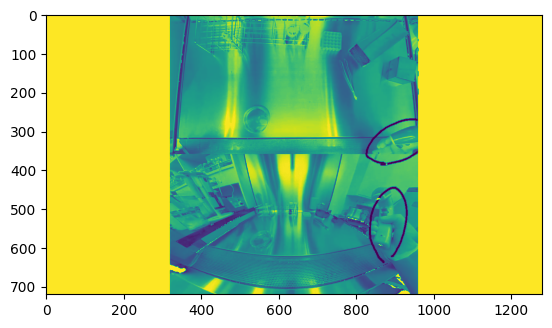

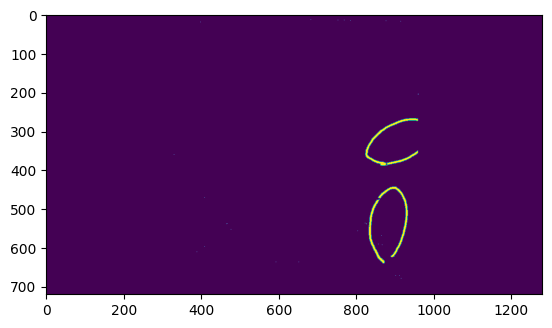

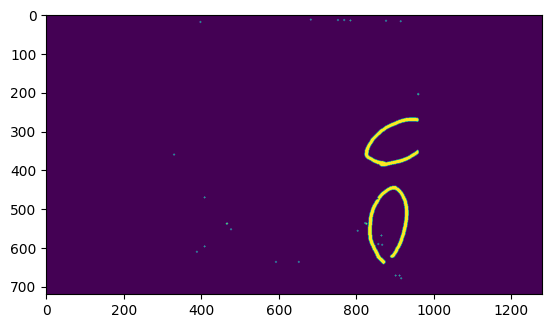

In [27]:
first_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_RGB2GRAY)
last_frame_gray = cv2.cvtColor(last_frame, cv2.COLOR_RGB2GRAY)
last_frame_gray[first_frame_gray < 20] = 255
plt.imshow(last_frame_gray)
plt.show()

_, last_frame_bin = cv2.threshold(last_frame_gray, 10, 255, cv2.THRESH_BINARY_INV)
plt.imshow(last_frame_bin)
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
last_frame_bin = cv2.dilate(last_frame_bin, kernel)
plt.imshow(last_frame_bin)
plt.show()

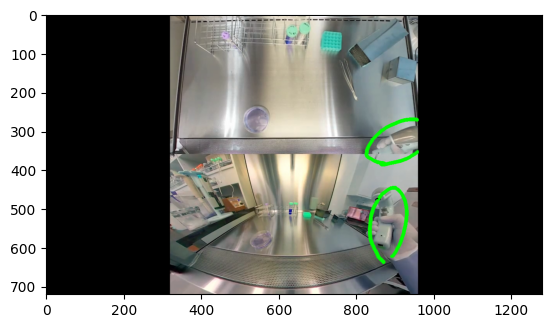

In [28]:
contours, hierarchy = cv2.findContours(last_frame_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = list(filter(lambda x: 100 < cv2.contourArea(x) and cv2.contourArea(x) < 1200 * 700, contours))

last_frame_contours = cv2.drawContours(last_frame.copy(), contours, -1, (0, 255, 0), -1)
plt.imshow(last_frame_contours)
plt.show()

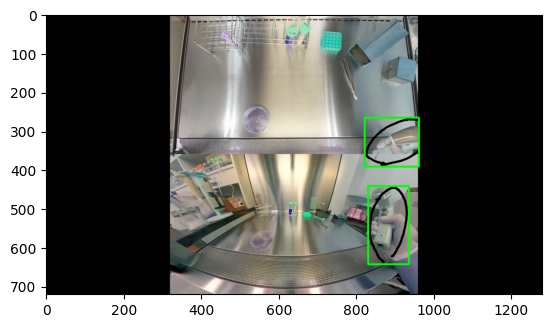

In [29]:
last_frame_bbox = last_frame.copy()
bbox_lst = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w < 20 or h < 20:
        continue  # skip thin objects
    bbox_lst.append((x, y, x + w, y + h))
    last_frame_bbox = cv2.rectangle(last_frame_bbox, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(last_frame_bbox)
plt.show()